# Section 1: Business Understanding

The purpose of this project is begin building a data science portfolio of my own. I will be creating a blog post and Github repository reflecting findings from 2017 Stack Overflow survey data


### Question 1: What is the most important trait that recruiters look for in a software developer?

### Question 2: Is there a positive correlation between salary and career satisfaction?

### Question 3: How do you pronouce "GIF"?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline







# Section 2: Data Understanding

### Gather & Explore

In [3]:
df = pd.read_csv (r'C:\Users\E046585\Desktop\000TEMP FILES\Udacity Data Scientist Nanodegree\Public.csv')
schema = pd.read_csv (r'C:\Users\E046585\Desktop\000TEMP FILES\Udacity Data Scientist Nanodegree\Schema.csv')
df.shape

(51392, 154)

The database is made up of 51,392 rows and 154 rows. Now, I will pull up the first five rows of data to get a preview of what the data looks like. 

In [4]:
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Section 3: Data Preparation

It is important to clean the data in order to optimize the usefulness of it. I have chosen to remove data with missing values. This will minimize issues with the modeling for question 2 and the averaging to be done for question 1.

In [7]:
Important_Traits = df[['ImportantHiringAlgorithms','ImportantHiringTechExp','ImportantHiringCommunication','ImportantHiringOpenSource','ImportantHiringPMExp','ImportantHiringCompanies','ImportantHiringTitles','ImportantHiringEducation','ImportantHiringRep','ImportantHiringGettingThingsDone']]

Imp_Trait_Values = Important_Traits.dropna()
#drop any row with a missing value

ITV = Imp_Trait_Values.replace(to_replace=['Very important','Important','Somewhat important','Not very important','Not at all important'], value=[5,4,3,2,1])

#replace word responses with values

In [8]:
Salary_Satisfaction = df[['CareerSatisfaction','JobSatisfaction','Salary']]
SalSat_drop = Salary_Satisfaction.dropna()

#drop any data with a missing value

In [12]:
gif_vals = df.PronounceGIF.value_counts()

#Provide a panda series of the counts for each answer to the GIF question


# Section 4: Data Modeling

Question 2 is looking to evaluate the relationship between Career Satisfaction and Salary. This will require modeling to determine if the correlation is positive or negative. I split up the data between training and test data and then built a linear model based on the training data.

In [9]:


# Consider only numerica variables
X = SalSat_drop[['CareerSatisfaction']]
y = SalSat_drop['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

#Four steps:

#Instantiate
regr = linear_model.LinearRegression()


regr.fit(X_train, y_train) 

y_pred = regr.predict(X_test)



# Section 5: Evaluate the Results

### Question 1: What is the most important trait that recruiters look for in a software developer?

In [10]:


ITV.mean().sort_values(ascending=False)

#find the mean value of each column and sort by highest to lowest


ImportantHiringCommunication        4.106257
ImportantHiringGettingThingsDone    4.096540
ImportantHiringAlgorithms           3.765145
ImportantHiringTechExp              3.529407
ImportantHiringPMExp                2.889290
ImportantHiringCompanies            2.827788
ImportantHiringOpenSource           2.806478
ImportantHiringEducation            2.768274
ImportantHiringTitles               2.725837
ImportantHiringRep                  2.258557
dtype: float64

After looking at the average value of each trait, communication and getting things done had the highest average score and were the only characteristics over 4. Reputation, Titles, and Education all carried averages below 2.8 and were thus not highly valued.

### Question 2: Is there a positive correlation between salary and career satisfaction?


<function r2_score at 0x0000027534425280>


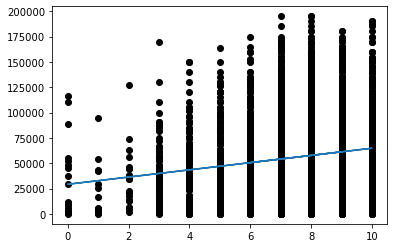

In [11]:
plt.scatter(X_test,y_test, color = 'black')
plt.plot(X_test, y_pred)

print(r2_score)

While it is slight, the model did produce a line with a positive correlation. As the Career Satisfaction score increases, so did salary. 

### Question 3: How do you pronouce "GIF"?


With a hard "g," like "gift"              0.651541
With a soft "g," like "jiff"              0.260897
Enunciating each letter: "gee eye eff"    0.060029
Some other way                            0.020061
Name: PronounceGIF, dtype: float64

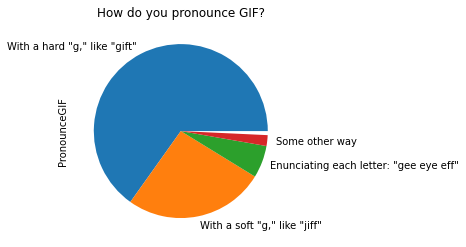

In [6]:
#The below will be a pie chart of the proportion of individuals who gave each type of response

(gif_vals/df.shape[0]).plot(kind="pie");
plt.title("How do you pronounce GIF?");
gif_vals/df.shape[0]

The pie chart reflects how the hard "g" pronounciation made up a clear majority of the respondents. The soft "g" position was also clearly second at just over a quarter of responses. 